Impotr data

In [1]:
import pandas as pd

In [3]:
customers = pd.read_csv('customers.csv')

In [5]:
customers.head()

,customer_id,name,gender,age,location
0,C001,Paula Hall,M,56,Alexiston
1,C002,Samantha Valenzuela,M,46,Cynthiafurt
2,C003,Erika Wiley,F,32,New John
3,C004,Christine Burns,M,60,Port Kimberlyville
4,C005,Adam Webb,M,25,Cooperstad


In [6]:
customers.shape

(100, 5)

In [7]:
products = pd.read_csv('products.csv')

In [8]:
products.head()

,product_id,product_name,category,cost_per_unit
0,P001,Widget A,Electronics,7.0
1,P002,Widget B,Electronics,12.0
2,P003,Gadget X,Home,5.0
3,P004,Gadget Y,Home,8.0
4,P005,Tool Z,Outdoors,15.0


In [9]:
products.shape

(5, 4)

In [10]:
transections = pd.read_csv('transactions.csv')

In [11]:
transections.head()

,transaction_id,customer_id,product_id,date,quantity,price_per_unit
0,T0001,C060,P005,2023-10-17,3,20.39
1,T0002,C033,P005,2023-08-29,4,26.75
2,T0003,C002,P001,2023-08-16,1,11.79
3,T0004,C088,P005,2023-04-15,2,22.30
4,T0005,C097,P003,2023-05-08,1,9.66


In [12]:
transections.shape

(1000, 6)

In [13]:
df = transections.merge(customers, on = 'customer_id').merge(products, on='product_id')

In [14]:
df.head()

,transaction_id,customer_id,product_id,date,quantity,price_per_unit,name,gender,age,location,product_name,category,cost_per_unit
0,T0001,C060,P005,2023-10-17,3,20.39,Valerie Jones,M,53,New Alexander,Tool Z,Outdoors,15.0
1,T0002,C033,P005,2023-08-29,4,26.75,Jennifer Vincent,F,33,Port Gary,Tool Z,Outdoors,15.0
2,T0003,C002,P001,2023-08-16,1,11.79,Samantha Valenzuela,M,46,Cynthiafurt,Widget A,Electronics,7.0
3,T0004,C088,P005,2023-04-15,2,22.30,Frank Bennett,F,42,Lewisport,Tool Z,Outdoors,15.0
4,T0005,C097,P003,2023-05-08,1,9.66,Jillian Gould,M,26,Port Angela,Gadget X,Home,5.0


In [16]:
df['total_amount']= df['quantity']*df['price_per_unit']
df['total_cost']=df['quantity']*df['cost_per_unit']
df['profit']=df['total_amount']-df['total_cost']
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

In [17]:
df

,transaction_id,customer_id,product_id,date,quantity,price_per_unit,name,gender,age,location,product_name,category,cost_per_unit,total_amount,total_cost,profit,month
0,T0001,C060,P005,2023-10-17,3,20.39,Valerie Jones,M,53,New Alexander,Tool Z,Outdoors,15.0,61.17,45.0,16.17,2023-10
1,T0002,C033,P005,2023-08-29,4,26.75,Jennifer Vincent,F,33,Port Gary,Tool Z,Outdoors,15.0,107.00,60.0,47.00,2023-08
2,T0003,C002,P001,2023-08-16,1,11.79,Samantha Valenzuela,M,46,Cynthiafurt,Widget A,Electronics,7.0,11.79,7.0,4.79,2023-08
3,T0004,C088,P005,2023-04-15,2,22.30,Frank Bennett,F,42,Lewisport,Tool Z,Outdoors,15.0,44.60,30.0,14.60,2023-04
4,T0005,C097,P003,2023-05-08,1,9.66,Jillian Gould,M,26,Port Angela,Gadget X,Home,5.0,9.66,5.0,4.66,2023-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T0996,C032,P001,2023-12-25,3,12.14,Shelby Hayes,M,45,Suefort,Widget A,Electronics,7.0,36.42,21.0,15.42,2023-12
996,T0997,C004,P002,2023-06-10,2,21.76,Christine Burns,M,60,Port Kimberlyville,Widget B,Electronics,12.0,43.52,24.0,19.52,2023-06
997,T0998,C064,P005,2023-05-20,2,23.42,April Guzman,F,23,Lake Melissa,Tool Z,Outdoors,15.0,46.84,30.0,16.84,2023-05
998,T0999,C050,P005,2023-01-10,2,19.84,Carol Martin,M,37,Norrischester,Tool Z,Outdoors,15.0,39.68,30.0,9.68,2023-01


In [21]:
sales_by_category = df.groupby('category')['total_amount'].sum().sort_values(ascending= False)

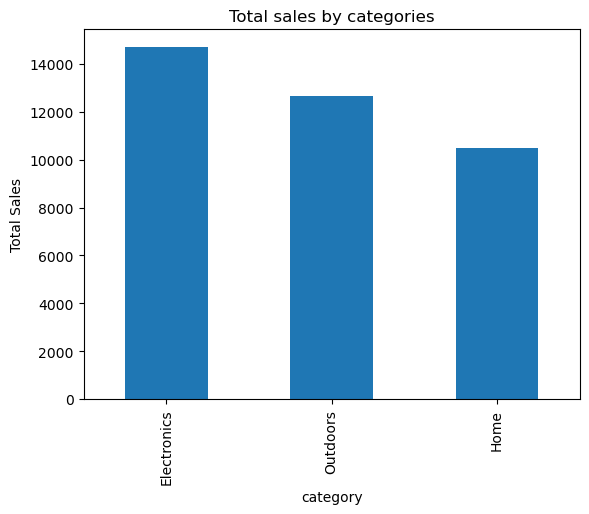

In [26]:
import matplotlib.pyplot as plt

sales_by_category.plot(kind= 'bar', title = 'Total sales by categories')
plt.ylabel('Total Sales')
plt.xlabel('category')
plt.show()

In [29]:
top_costomers=df.groupby('name')['total_amount'].sum().sort_values(ascending=False).head(10)


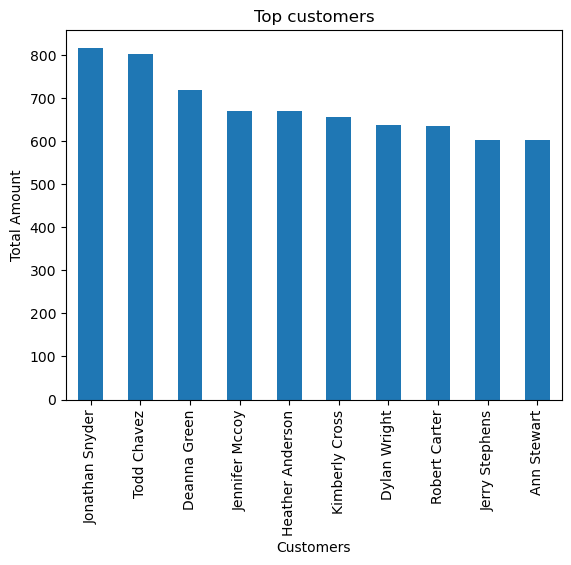

In [30]:
top_costomers.plot(kind='bar',title='Top customers')
plt.ylabel('Total Amount')
plt.xlabel('Customers')
plt.show()

<Axes: title={'center': 'Monthly Sales'}, xlabel='month'>

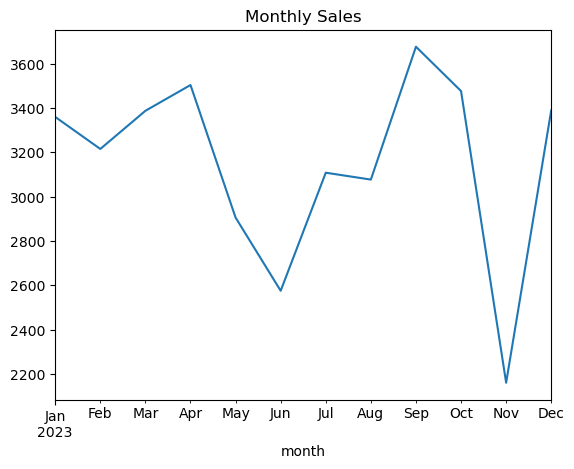

In [31]:
df.groupby('month')['total_amount'].sum().plot(kind='line', title='Monthly Sales')


<Axes: title={'center': 'Profit for products'}, xlabel='product_name'>

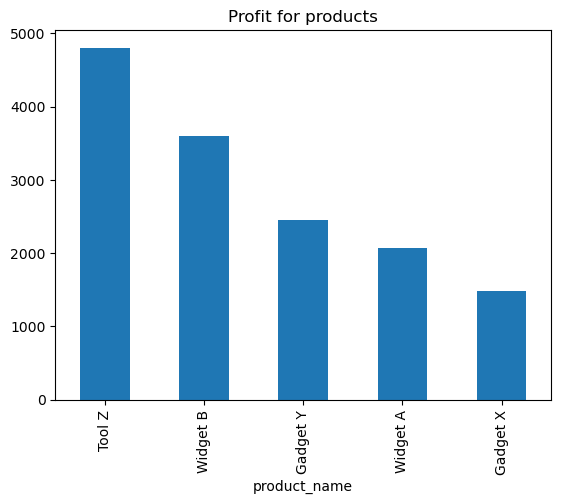

In [33]:
df.groupby('product_name')['profit'].sum().sort_values(ascending=False).plot(kind='bar', title='Profit for products')

In [34]:
df.head(5)

,transaction_id,customer_id,product_id,date,quantity,price_per_unit,name,gender,age,location,product_name,category,cost_per_unit,total_amount,total_cost,profit,month
0,T0001,C060,P005,2023-10-17,3,20.39,Valerie Jones,M,53,New Alexander,Tool Z,Outdoors,15.0,61.17,45.0,16.17,2023-10
1,T0002,C033,P005,2023-08-29,4,26.75,Jennifer Vincent,F,33,Port Gary,Tool Z,Outdoors,15.0,107.00,60.0,47.00,2023-08
2,T0003,C002,P001,2023-08-16,1,11.79,Samantha Valenzuela,M,46,Cynthiafurt,Widget A,Electronics,7.0,11.79,7.0,4.79,2023-08
3,T0004,C088,P005,2023-04-15,2,22.30,Frank Bennett,F,42,Lewisport,Tool Z,Outdoors,15.0,44.60,30.0,14.60,2023-04
4,T0005,C097,P003,2023-05-08,1,9.66,Jillian Gould,M,26,Port Angela,Gadget X,Home,5.0,9.66,5.0,4.66,2023-05


In [35]:
df.to_csv('df_sales.csv', index = False)